Import libraries

In [ ]:
import pandas as pd, warnings, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define seed
random_seed = 5697

# Load processed data
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/validation.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")



# Define models for benchmarking
benchmark_models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed),
}


In [3]:
# Define seed
random_seed = 8576

# Loading processed data
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/validation.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

# Define number of parallel jobs
num_jobs = 1

# Define whether to skip fine-tuning
skip_fine_tuning = False

# Define models
models = [MultinomialNB(), RandomForestClassifier(random_state=random_seed), SVC(random_state=random_seed)]

# Function to fit a model on train data
def fit_model(train_df, vectorizer, model):
    X_train = vectorizer.fit_transform(train_df["text"])
    y_train = train_df["spam"]
    model.fit(X_train, y_train)
    return model, vectorizer

# Function to score a model on given data
def score_model(model, vectorizer, data_df):
    X = vectorizer.transform(data_df["text"])
    y_true = data_df["spam"]
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=["Ham", "Spam"])
    confusion_matrix_data = confusion_matrix(y_true, y_pred)
    return accuracy, report, confusion_matrix_data

# Function to validate the model using cross-validation
def cross_validate_model(model, vectorizer, data_df):
    X = vectorizer.transform(data_df["text"])
    y = data_df["spam"]
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    return scores.mean()

# Function to score and evaluate model
def score_and_evaluate_model_and_get_accuracy(model, vectorizer, check_data_df, check_data_type):
    check_accuracy, check_classification_report, check_confusion_matrix = score_model(model, vectorizer, check_data_df)
    print(f"{check_data_type} Accuracy: {round(100 * check_accuracy, 2)} %")
    print(f"{check_data_type} Classification Report:\n{check_classification_report}")
    print(f"{check_data_type} Confusion Matrix:")
    display = ConfusionMatrixDisplay(confusion_matrix=check_confusion_matrix, display_labels=['HAM', 'SPAM'])
    display.plot()
    plt.show()
    return check_accuracy

# Function to fine-tune the model based on train and validation
def fine_tune_model(model, vectorizer, train_df, validation_df):
    if skip_fine_tuning:
        return model

    combined_data = pd.concat([train_df, validation_df], axis=0)

    if isinstance(model, MultinomialNB):
        param_grid = {'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]}
        model_name = "Multinomial Naive Bayes"
    if isinstance(model, RandomForestClassifier):
        param_grid = {"n_estimators": [100, 200], "criterion": ["gini", "entropy"], "max_depth": [None, 10, 20], "min_samples_split": [2, 5], "min_samples_leaf": [1, 2], "max_features": ["auto", "sqrt"], "bootstrap": [True, False]}
        model_name = "Random Forest"
    if isinstance(model, SVC):
        param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "poly", "rbf", "sigmoid"], "degree": [2, 3, 4], "gamma": ["scale", "auto"], "shrinking": [True, False]}
        model_name = "Support Vector Machine"

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=num_jobs)
    X_combined = vectorizer.transform(combined_data["text"])
    y_combined = combined_data["spam"]
    grid_search.fit(X_combined, y_combined)

    model = grid_search.best_estimator_

    print(f"Best Hyper Parameter for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}")

    return model


**Fit Multinomial Naive Bayes**

In [10]:
#trying to fit multinomial naive bayes
naive_bayes_model, nb_vectorizer = fit_model(train_data, TfidfVectorizer(), benchmark_models["Multinomial Naive Bayes"])


Train Data Accuracy: 89.44 %
Train Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.88      1.00      0.93      3328
        Spam       1.00      0.57      0.73      1075

    accuracy                           0.89      4403
   macro avg       0.94      0.78      0.83      4403
weighted avg       0.91      0.89      0.88      4403

Train Data Confusion Matrix:


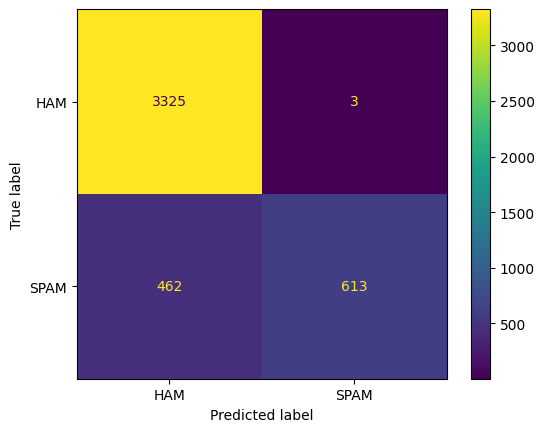

In [11]:
temporary1= score_and_evaluate_model_and_get_accuracy(naive_bayes_model, nb_vectorizer, train_data, "Train Data")
#fitting multinomial naive bayes on train data

Validation Data Accuracy: 86.0 %
Validation Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.84      1.00      0.91       412
        Spam       1.00      0.44      0.61       138

    accuracy                           0.86       550
   macro avg       0.92      0.72      0.76       550
weighted avg       0.88      0.86      0.84       550

Validation Data Confusion Matrix:


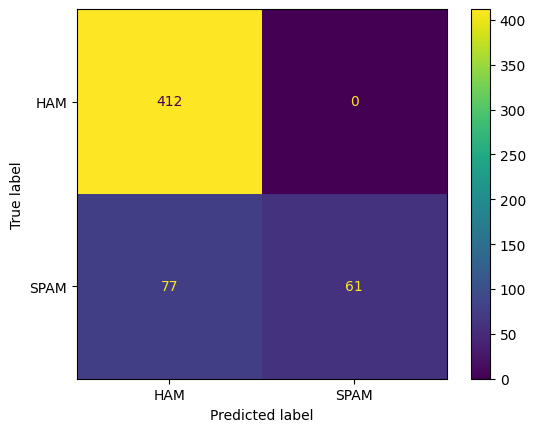

In [12]:
_temporary2= score_and_evaluate_model_and_get_accuracy(naive_bayes_model, nb_vectorizer, validation_data, "Validation Data")
#fitting multinomial naive bayes on validation data

In [13]:
naive_bayes_model = fine_tune_model(naive_bayes_model, nb_vectorizer, train_data, validation_data)
#trying to fine tune naive bayes

Best Hyper Parameter for Multinomial Naive Bayes: {'alpha': 0.1, 'fit_prior': False}
Best Score for Multinomial Naive Bayes: 0.9911145766443445


Test Data Accuracy: 99.27 %
Test Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       397
        Spam       1.00      0.97      0.99       154

    accuracy                           0.99       551
   macro avg       1.00      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551

Test Data Confusion Matrix:


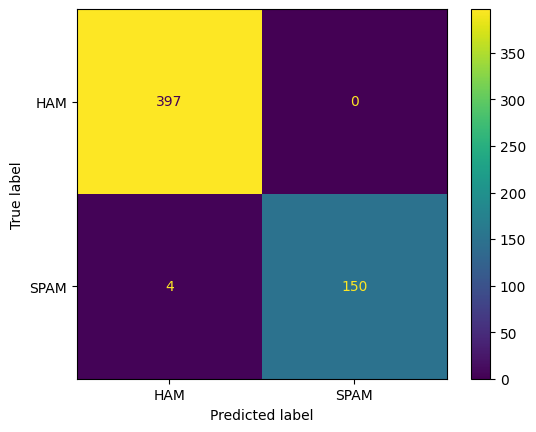

In [15]:
# Score on test data
test_accuracy_nb = score_and_evaluate_model_and_get_accuracy(naive_bayes_model, nb_vectorizer, test_data, "Test Data")




**Fitting Ramdom Forest**

In [16]:
# Fit the Random Forest model and initialize a vectorizer
random_forest_model, rf_vectorizer = fit_model(train_data, TfidfVectorizer(), benchmark_models["Random Forest"])


Train Data Accuracy: 100.0 %
Train Data Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      3328
        Spam       1.00      1.00      1.00      1075

    accuracy                           1.00      4403
   macro avg       1.00      1.00      1.00      4403
weighted avg       1.00      1.00      1.00      4403

Train Data Confusion Matrix:


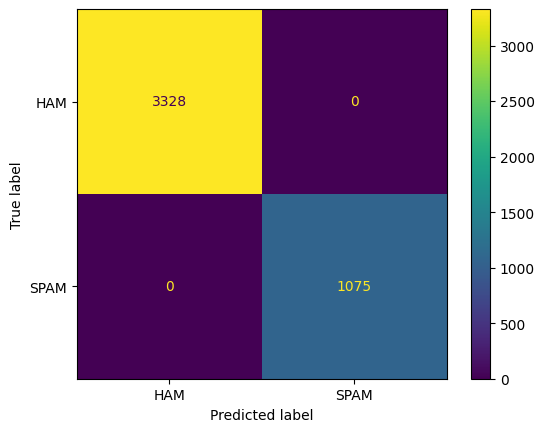

In [18]:
temporary_4= score_and_evaluate_model_and_get_accuracy(random_forest_model, rf_vectorizer, train_data, "Train Data")
#random forest on train data

Validation Data Accuracy: 96.36 %
Validation Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.98       412
        Spam       1.00      0.86      0.92       138

    accuracy                           0.96       550
   macro avg       0.98      0.93      0.95       550
weighted avg       0.97      0.96      0.96       550

Validation Data Confusion Matrix:


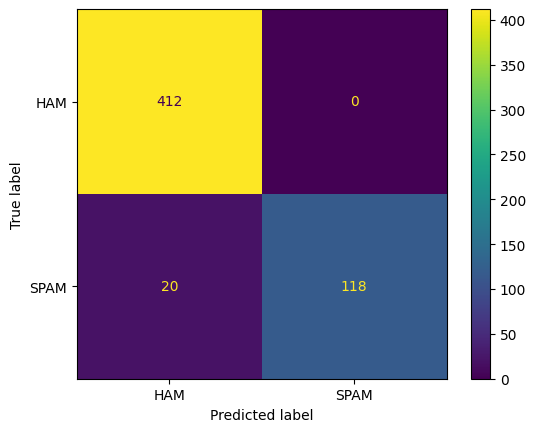

In [19]:
_temporay_5= score_and_evaluate_model_and_get_accuracy(random_forest_model, rf_vectorizer, validation_data, "Validation Data")
#random forest on validation data

In [23]:
random_forest_model = fine_tune_model(random_forest_model, rf_vectorizer, train_data, validation_data)
#fne tuning random forest

"Best Hyper Parameter for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}Best Score for Random Forest: 0.9852633295620178"

Test Data Accuracy: 94.92 %
Test Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       397
        Spam       0.99      0.82      0.90       154

    accuracy                           0.95       551
   macro avg       0.96      0.91      0.93       551
weighted avg       0.95      0.95      0.95       551

Test Data Confusion Matrix:


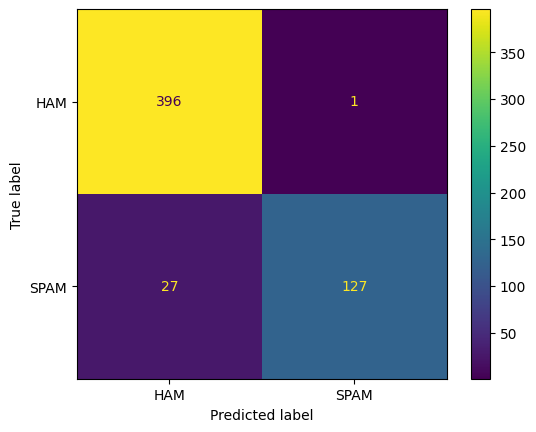

In [24]:
# Score on test data
test_accuracy_rf = score_and_evaluate_model_and_get_accuracy(random_forest_model, rf_vectorizer, test_data, "Test Data")


**Fitting  SVM and checkiong accuracy**

In [33]:
# Fit the Random Forest model and initialize the vectorizer
svm_model, rf_vectorizer = fit_model(train_data, TfidfVectorizer(), benchmark_models["Support Vector Machine"])


Train Data Accuracy: 100.0 %
Train Data Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      3328
        Spam       1.00      1.00      1.00      1075

    accuracy                           1.00      4403
   macro avg       1.00      1.00      1.00      4403
weighted avg       1.00      1.00      1.00      4403

Train Data Confusion Matrix:


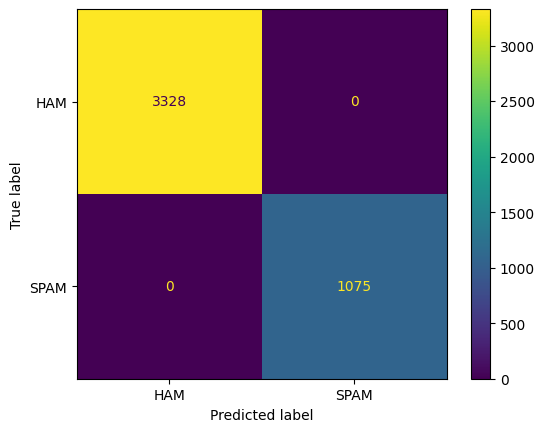

In [34]:
temporary_5 = score_and_evaluate_model_and_get_accuracy(svm_model, rf_vectorizer, train_data, "Train Data")
#evaluate the svm model for accuracy on train data

Validation Data Accuracy: 99.64 %
Validation Data Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       412
        Spam       0.99      0.99      0.99       138

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550

Validation Data Confusion Matrix:


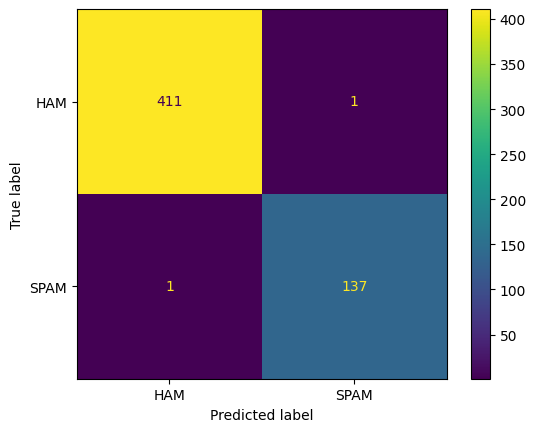

In [35]:
temporary_5= score_and_evaluate_model_and_get_accuracy(svm_model, rf_vectorizer, validation_data, "Validation Data")
#evaluate the svm model for accuracy on validation data

In [41]:
svm_model = fine_tune_model(svm_model, rf_vectorizer, train_data, validation_data)
#finetuning the svm model

"Best Hyper Parameter for Random Forest: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}Best Score for Random Forest: 0.9852633295620178"

Test Data Accuracy: 99.27 %
Test Data Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       397
        Spam       1.00      0.97      0.99       154

    accuracy                           0.99       551
   macro avg       1.00      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551

Test Data Confusion Matrix:


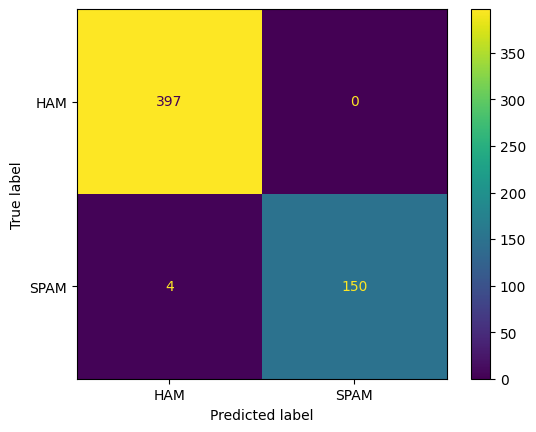

In [42]:
test_accuracy_rf = score_and_evaluate_model_and_get_accuracy(random_forest_model, rf_vectorizer, test_data, "Test Data")
#check the test accuracy

**From the above 3 results we can see that the multinomial naive bayes and svm give the highest accuracy of 99.27 followed by Random Forest at 94.92**